# Overview:

The purpose of this project was to practise basic python skills as well as computing linear trend lines on data. This assignment is split into two tasks both of which require me to explore the data, compute trend lines and make visualisations.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# Task 1: NZ Electricity Production and Use
 

Loading Table 1 of the file electricity-statistics.xlsx and extracting a dataframe "df1" which contains the quarterly data about electicity generation, broken down by type (from 1974 onwards).

The command `elec = pd.ExcelFile('location')` makes the xlsx file in location available.

`pd.read_excel(elec, 'Table 1',skiprows=1)` will read the Table 1 sheet. I had to change the number of rows to be skipped.


In [4]:
# Here is the code to do this for Table 1
xls = pd.ExcelFile('electricity-statistics.xlsx') # Read the whole excel file into an object called "xls"
df1 = pd.read_excel(xls, 'Table 1',skiprows=9) # Read sheet named "Table 1", skip 9 blank rows on top
df1 = df1.drop(0) # As row 10 in the excel file is now title row, row 11 becomes row 0. Drop it as it is blank.
df1.head() # Have a look at the data

,Calendar quarters,1974-03-01 00:00:00,1974-06-01 00:00:00,1974-09-01 00:00:00,1974-12-01 00:00:00,1975-03-01 00:00:00,1975-06-01 00:00:00,1975-09-01 00:00:00,1975-12-01 00:00:00,1976-03-01 00:00:00,...,2016-09-01 00:00:00,2016-12-01 00:00:00,2017-03-01 00:00:00,2017-06-01 00:00:00,2017-09-01 00:00:00,2017-12-01 00:00:00,2018-03-01 00:00:00,2018-06-01 00:00:00,2018-09-01 00:00:00,% change when compared to the same quarter of the previous year
1,"Net Generation (GWh)1,2",4051.204,4802.204,5648.204,5674.204,4136.204,5298.354,5881.354,4804.354,4556.354,...,11424.211488,10260.673920,10093.278816,10878.471265,11438.620188,10500.479446,9963.954927,11039.265290,11555.014205,0.010176
2,Hydro,3201.000,3432.000,4174.000,4230.000,3242.000,4330.000,4842.000,4083.000,3604.000,...,7154.273797,6517.501803,6142.702235,6061.158635,6571.060901,6158.797630,5775.343498,6842.961914,7179.706536,0.092625
3,Geothermal,299.500,341.500,358.500,358.500,317.500,345.500,348.500,338.500,294.500,...,1873.367542,1757.436626,1817.047880,1912.620232,1938.536999,1790.770884,1699.632750,1838.438644,1923.034067,-0.007997
4,Biogas,1.899,1.899,1.899,1.899,1.899,13.149,13.149,13.149,13.149,...,62.606298,62.880248,62.373028,60.737144,61.101644,60.080544,60.072144,59.296844,60.827985,-0.004479
5,Wood,76.535,76.535,76.535,76.535,76.535,76.535,76.535,76.535,76.535,...,87.151671,79.833569,82.078624,76.614528,76.677698,68.183730,79.259094,72.708856,58.215141,-0.240781


### Getting the necessary data
The first step was to get the numbers for both overall consumption and generation over time by reading them out of df1. The two datasets are different lengths (shown by the NaN values), so I had to only read the relevant parts of them. 

In [5]:
gen = df1.iloc[0,62:-1]  # Read generation figures from row 0 of df1. As this series is longer than the consumption one, we read only from column 62
con = df1.iloc[14,62:-1] # Read consumption figures from row 14 of df1. 

### Plotting the generation and consumption on the same time axis. 

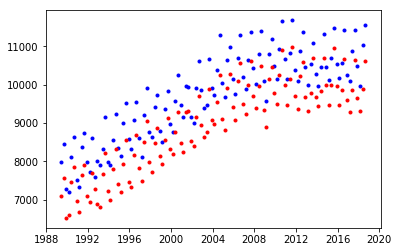

In [6]:
pl.plot(gen,'b.')
pl.plot(con,'r.')

### Plot a histogram of generation methods over time. 

`pl.bar()` is the command for plotting a bar chart. Find out more using the help command or by looking at https://pythonspot.com/matplotlib-bar-chart/


In [7]:
# Example for 3 types of generation methods
hyd=df1.iloc[1,1:]
geo=df1.iloc[2,1:]
gas=df1.iloc[9,1:]

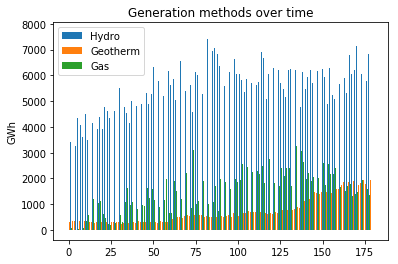

In [8]:
N = len(hyd)
ind = np.arange(N)    # index for the groups
width = 0.3           # the width of the bars

# Construct 3 bar charts
p1 = pl.bar(ind, hyd, width)
p2 = pl.bar(ind+width, geo, width)
p3 = pl.bar(ind+2*width, gas, width)

# Stack them and construct the legend
pl.ylabel('GWh')
pl.title('Generation methods over time')
pl.legend((p1[0], p2[0], p3[0]), ('Hydro', 'Geotherm','Gas'))

pl.show()

### Plotting the  generation and consumption against each other, and fit a trend line to the data. I've given an example of plotting a trendline below.

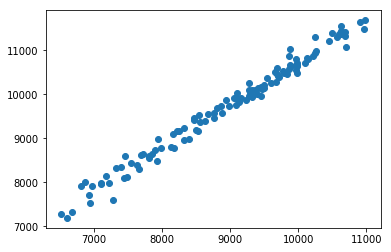

In [9]:
pl.plot(con,gen,'o') # Plot the figures

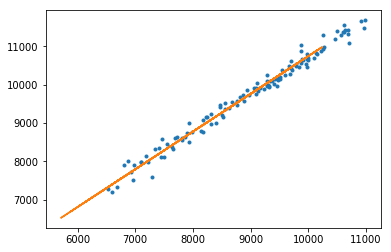

In [10]:
# Convert data type from panda to float
gen = pd.to_numeric(gen, errors='coerce')
con = pd.to_numeric(con, errors='coerce')

# Fit the linear model
fit = np.polyfit(gen,con,1)

# Get the values at the datapoints
l = con*fit[0] + fit[1] 

pl.plot(con,gen,'.')
pl.plot(l,con)

### Example of computing a trend line
To compute a trend line in Numpy we can use `np.polyfit`. This was demonstrated in the lectures, so I made a fake example to test it out

I also needed to use `gen = pd.to_numeric(gen, errors='coerce')` (and similarily for con) so that Python treats the numbers as floating point numbers.

In [11]:
# Here is some fake data for sample purposes
df = pd.DataFrame({'consumption': [ 503 , 584 , 587 ,570 , 566 , 656 , 662, 682 , 705 , 750 , 780 , 845 , 891 , 976 ],
                  'date': np.arange(14)})

In [12]:
# Compute a least-squares fit to the two variables
fit = np.polyfit(df.date,df.consumption,1)
# Get the values at the datapoints
l = df.date*fit[0] + fit[1] 

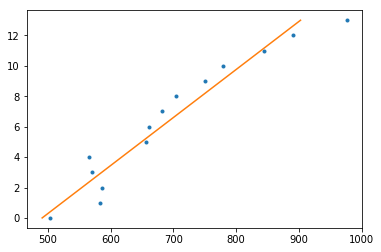

In [13]:
pl.plot(df.consumption,df.date,'.')
pl.plot(l,df.date)

# Task 2:  CO2 data



Starting by loading the data in and giving the columns some more useful names:

In [14]:
co2 = pd.read_csv('daily_flask_co2_mlo.csv',skiprows=70,header=None,parse_dates=[0])
co2.columns = ['Date','Time','T1','T2','Flag1','Flag2','CO2']

If we are going to look at the year, then we need to extract it from the Date column on the dataset. One way to do this is by using the little function that I've written below. 

In [15]:
def split_date(df,col):
    df[col+"_year"] = df[col].apply(lambda x: x.year)
    df[col+"_month"] = df[col].apply(lambda x: x.month)
    df[col+"_day"] = df[col].apply(lambda x: x.day)

To run it, and then show the results, use the following commands.

In [16]:
split_date(co2,'Date')
co2.head()

,Date,Time,T1,T2,Flag1,Flag2,CO2,Date_year,Date_month,Date_day
0,1960-03-31,16:00,22006.67,1960.248,2,0,318.29,1960,3,31
1,1960-04-23,10:30,22029.44,1960.310,3,4,318.61,1960,4,23
2,1960-04-24,08:00,22030.33,1960.312,3,0,319.33,1960,4,24
3,1960-07-03,15:20,22100.64,1960.504,2,4,320.35,1960,7,3
4,1960-07-17,17:00,22114.71,1960.543,2,4,315.95,1960,7,17


### Extracting the data for 2016, 2017, and 2018 and plotting it in two different ways:
1. In order, with the three years in different colours (so the time axis is 2016 -- 2018)
2. With the three years on top of each other in different colours (so the time axis is Jan -- Dec)

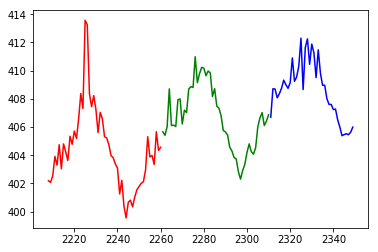

In [17]:
pl.plot(co2[co2.Date_year==2016].CO2,'r-')
pl.plot(co2[co2.Date_year==2017].CO2,'g-')
pl.plot(co2[co2.Date_year==2018].CO2,'b-')

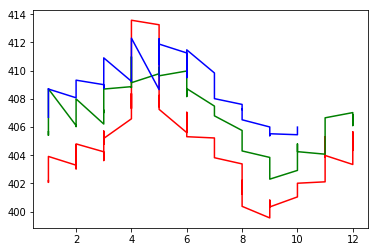

In [18]:
pl.plot(co2[co2.Date_year==2016].Date_month,co2[co2.Date_year==2016].CO2,'r-')
pl.plot(co2[co2.Date_year==2017].Date_month,co2[co2.Date_year==2017].CO2,'g-')
pl.plot(co2[co2.Date_year==2018].Date_month,co2[co2.Date_year==2018].CO2,'b-')

In [19]:
# we have to lose a lot of columns
co2_new = co2.iloc[:,[0,6]]
co2_new.columns = ['Date','CO2']

# And we should split the dates up again
split_date(co2_new,'Date')

# Telling Pandas that the Date column is actually an index to the datapoint
co2_new.set_index('Date',inplace=True,drop=False)

# We resample the data to average over the months
co2_m = co2_new.resample("M").mean()
co2_m.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,CO2,Date_year,Date_month,Date_day
Date,,,,
1960-03-31,318.29,1960.0,3.0,31.0
1960-04-30,318.97,1960.0,4.0,23.5
1960-05-31,NaN,NaN,NaN,NaN
1960-06-30,NaN,NaN,NaN,NaN
1960-07-31,318.15,1960.0,7.0,10.0


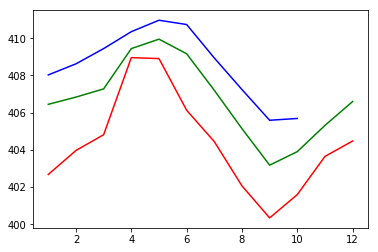

In [20]:
# Some of the months don't have any data, so get replaced by NaN. We need to drop those:
co2_m = co2_m.dropna()

# Now it looks better
co2_m.head()

# And here is the smoothed plot
pl.plot(co2_m[co2_m.Date_year==2016].Date_month,co2_m[co2_m.Date_year==2016].CO2,'r-')
pl.plot(co2_m[co2_m.Date_year==2017].Date_month,co2_m[co2_m.Date_year==2017].CO2,'g-')
pl.plot(co2_m[co2_m.Date_year==2018].Date_month,co2_m[co2_m.Date_year==2018].CO2,'b-')